In [1]:
from create_percent_diff_summary import collect_r2_scores, plot_r2_heatmap_with_symbols

2024-11-21 23:50:06.061355: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 23:50:06.065713: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 23:50:06.077528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732233006.097446   97286 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732233006.103192   97286 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 23:50:06.124268: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Processing folder: -2074223237608632438


2024-11-21 23:50:08.548704: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Processing folder: 3018420796423631326
Processing folder: 385785126364412875
Processing folder: -5378767990556019025
Processing folder: -8721302243423950900
Processing folder: -1555579470930404703
Processing folder: 873396586410074794
Processing folder: -4385726170902574240
Processing folder: -6732384669984308125
Processing folder: -5688998736288883500
Processing folder: 9100019189307562067
Processing folder: -8578990204916954013
Processing folder: 7859769112433691692
Processing folder: -5339593163521714121
Processing folder: -3586271143228161277
Processing folder: -2691622148981425901
Processing folder: -5378767990556019025
Processing folder: -2143628280432124037
Processing folder: -5675580404039521027
Processing folder: 1680180829675865592
Processing folder: 3123685554898137390
Processing folder: -8335083044558368468
Processing folder: 4478560288447804787
Processing folder: 4143972947282222655
Processing folder: -9108707032320630395
Processing folder: -3664852785364047222
Processing 

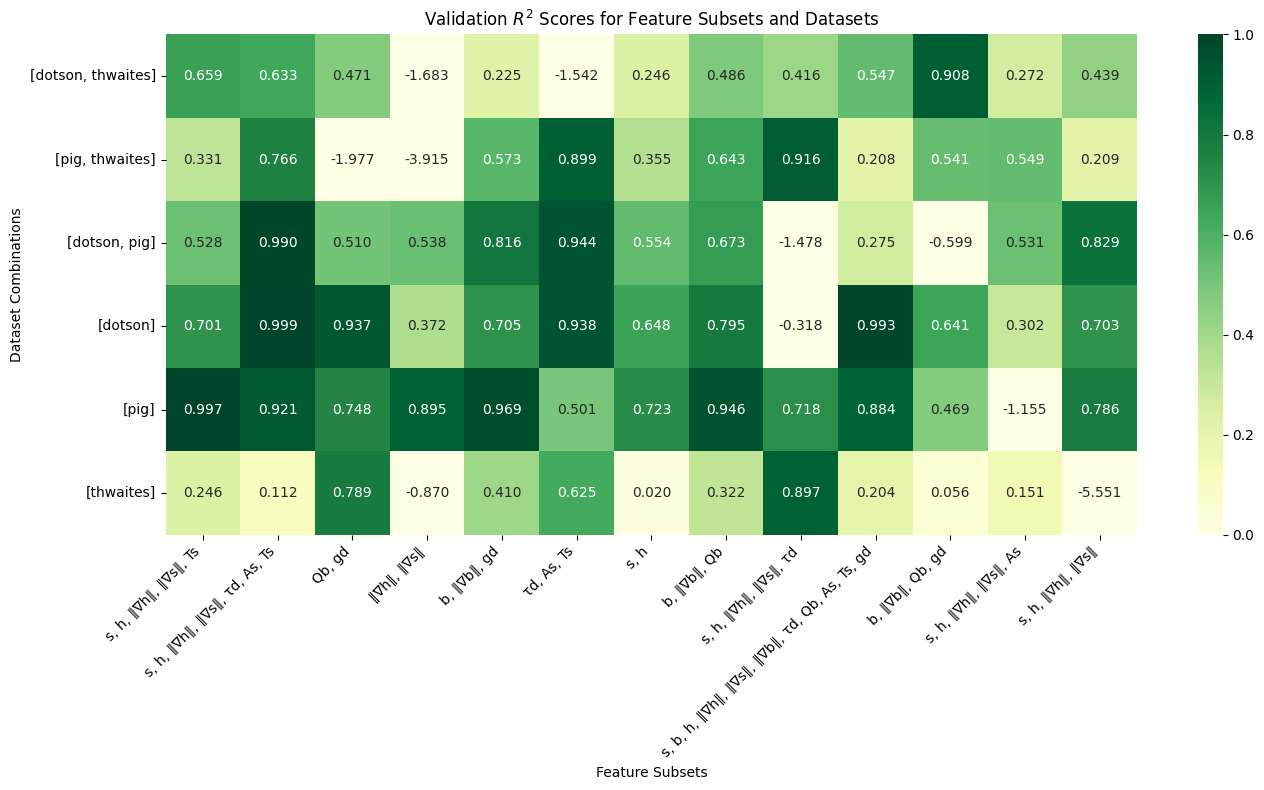

In [2]:
r2_scores, feature_labels = collect_r2_scores()
plot_r2_heatmap_with_symbols(r2_scores, feature_labels)